# **Final Project 2**

# 1.Perkenalan
Anggota Team :
1. Januwar By Khaqi 
2. Maya Setiana 
3. Rully Anggelia Sukarno Putri 

## 1.1. Latar Belakang
Data cuaca merupakan salah satu data yang penting dalam berbagai bidang seperti pertanian, transportasi, pariwisata, dan sebagainya. Namun, data cuaca tersebut seringkali tidak terorganisir dengan baik sehingga sulit untuk dianalisis. Oleh karena itu, perlu dilakukan pengolahan data agar data cuaca tersebut dapat dimanfaatkan dengan maksimal.

Pada final projek ke-2 ini, akan dilakukan pengolahan data cuaca dari dataset Weather Dataset Rattle Package yang berisi data cuaca di Australia. Data ini memiliki informasi mengenai cuaca pada hari ini dan prediksi cuaca untuk besok. Data tersebut mencakup variabel seperti suhu, kelembapan, tekanan udara, kecepatan angin, serta informasi apakah akan hujan pada hari ini dan besok.

Dalam projek ini, akan dilakukan beberapa tahap pengolahan data, seperti pembersihan data, eksplorasi data, serta pembuatan model prediksi untuk memprediksi apakah akan hujan pada besoknya. Dengan melakukan pengolahan data ini, diharapkan data cuaca yang tidak terorganisir dapat diolah menjadi informasi yang lebih berguna dan dapat membantu dalam berbagai bidang.

## 1.2. Objektif
Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# 2.Import Pustaka yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, roc_curve, auc

%matplotlib inline

# 3.Data Loading

disini memasukkan Dataframe, data yang digunakan yaitu dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/januwarby/PYTN_KampusMerdeka_fp2_JanuwarByKhaqi/master/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
# Menampilkan 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Analisis

Dataset ini memiliki 23 atribut. Atribut dalam dataset ini antara lain :
- Date
- Location
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir 
- WindGustSpeed 
- WindDir9am 
- WindDir3pm 
- WindSpeed9am 
- WindSpeed3pm 
- Humidity9am 
- Humidity3pm 
- Pressure9am 
- Pressure3pm 
- Cloud9am 
- Temp9am 
- Temp3pm 
- RainToday 
- RainTomorrow 

In [ ]:
# Melihat dimensi dataset
df.shape

(145460, 23)

dataframe yang digunakan memiliki total observasi sebanyak 145460 baris dan total variabel 23 kolom

In [ ]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

dari data di atas merupakan seluruh variabel yang terdapat dari dataset rideshare yang berjumlah sebanyak 23 variabel, dan memiliki 2 jenis tipe data yang terdiri dari object dan float

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Hasil di atas menunjukkan statistik deskriptif dari seluruh variabel dari dataset Rain in Australia

# 4.Exploratory Data Analysis (EDA)

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Dari hasil penghitungan nilai counts pada kolom "RainTomorrow" dalam DataFrame "df", terdapat 110316 baris data dengan nilai "No" dan 31877 baris data dengan nilai "Yes". Hal ini menunjukkan bahwa mayoritas data (sekitar 77,6%) tidak menunjukkan kemungkinan hujan besok ("No"), sedangkan sekitar 22,4% data lainnya menunjukkan kemungkinan terjadinya hujan besok ("Yes"). Analisis ini dapat memberikan gambaran awal tentang sebaran data dan distribusinya, serta dapat digunakan untuk keperluan perencanaan atau prediksi cuaca di masa depan. Namun, untuk analisis yang lebih mendalam dan akurat, perlu dilakukan pengecekan lebih lanjut terhadap sumber data dan faktor-faktor yang memengaruhi hasil penghitungan tersebut.

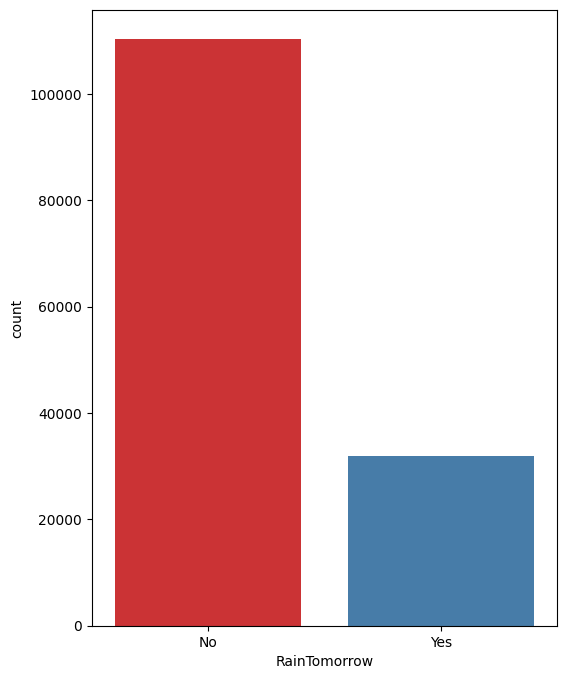

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

frekuensi Perbandingan data RainTomorrow sangat signifikan. Dimana data No sejumlah 110316 dan data Yes sejumlah 31877, yang berarti di Australia tidak sering terjadi hujan.

## 4.1. Distribusi Feature MinTemp

<ipython-input-9-6990040e4a6a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MinTemp, kde = False)


<Axes: xlabel='MinTemp'>

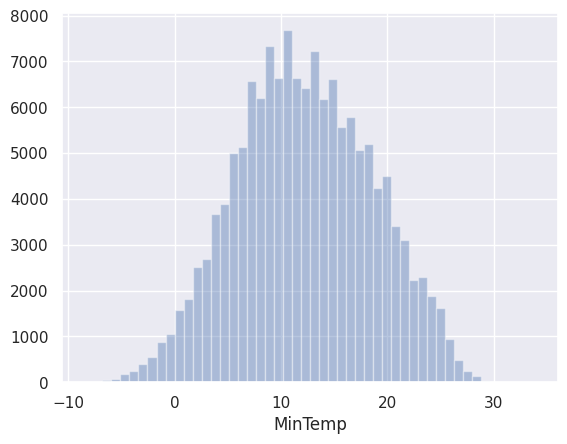

In [ ]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)

Rata - rata dari MinTemp di Australia ada diantara 8 dan 12 derajat

## 4.2. Distribusi Feature MaxTemp

<ipython-input-10-f885eb5d4a06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MaxTemp, kde = False)


<Axes: xlabel='MaxTemp'>

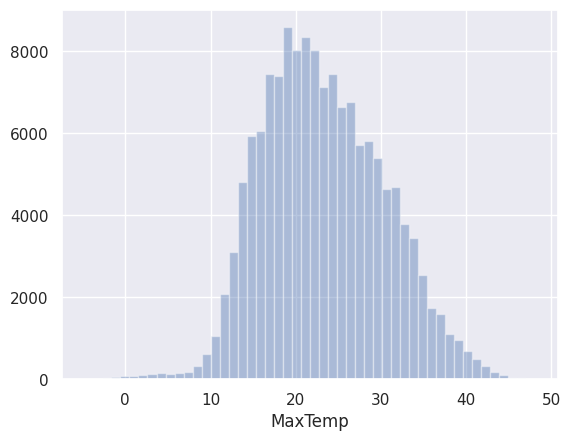

In [ ]:
sns.set(color_codes = True)
sns.distplot(df.MaxTemp, kde = False)

Rata - rata dari feature MaxTemp ada diantara 20 dan 23 derajat

In [ ]:
# Variance
print('Variance dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1))

Variance dari Kolom MaxTemp =  50.68085647143684


In [ ]:
# Standard Deviation
print('Standard Deviation dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1)**0.5)

Standard Deviation dari Kolom MaxTemp =  7.119048845979134


In [ ]:
# Percentiles
df['MaxTemp'].describe()

count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

Analisis
- Nilai standard deviation/variance menunjukkan seberapa tersebar data kita
- Nilai percentiles menunjukkan pada rentang 75%, 50%, 25% berapa nilai data.

## 4.3. Korelasi Antara MinTemp dan MaxTemp

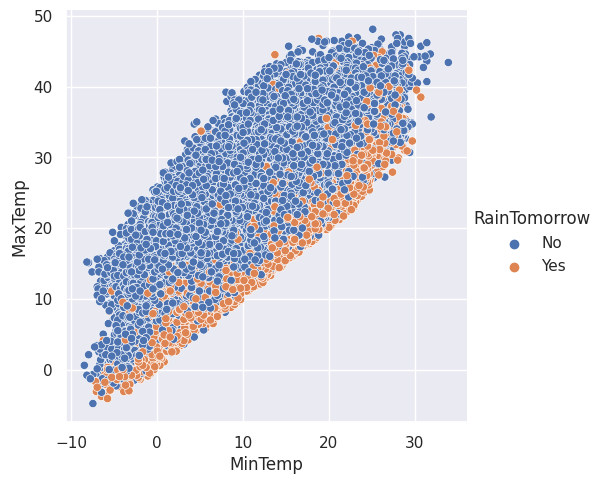

In [ ]:
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df)
plt.show()

Pada temperatur tinggi, rata - rata tidak terjadi hujan pada keesokan harinya. Temperatur mempengaruhi target

## 4.4. Distribusi Data yang Bertipe Data Numerik

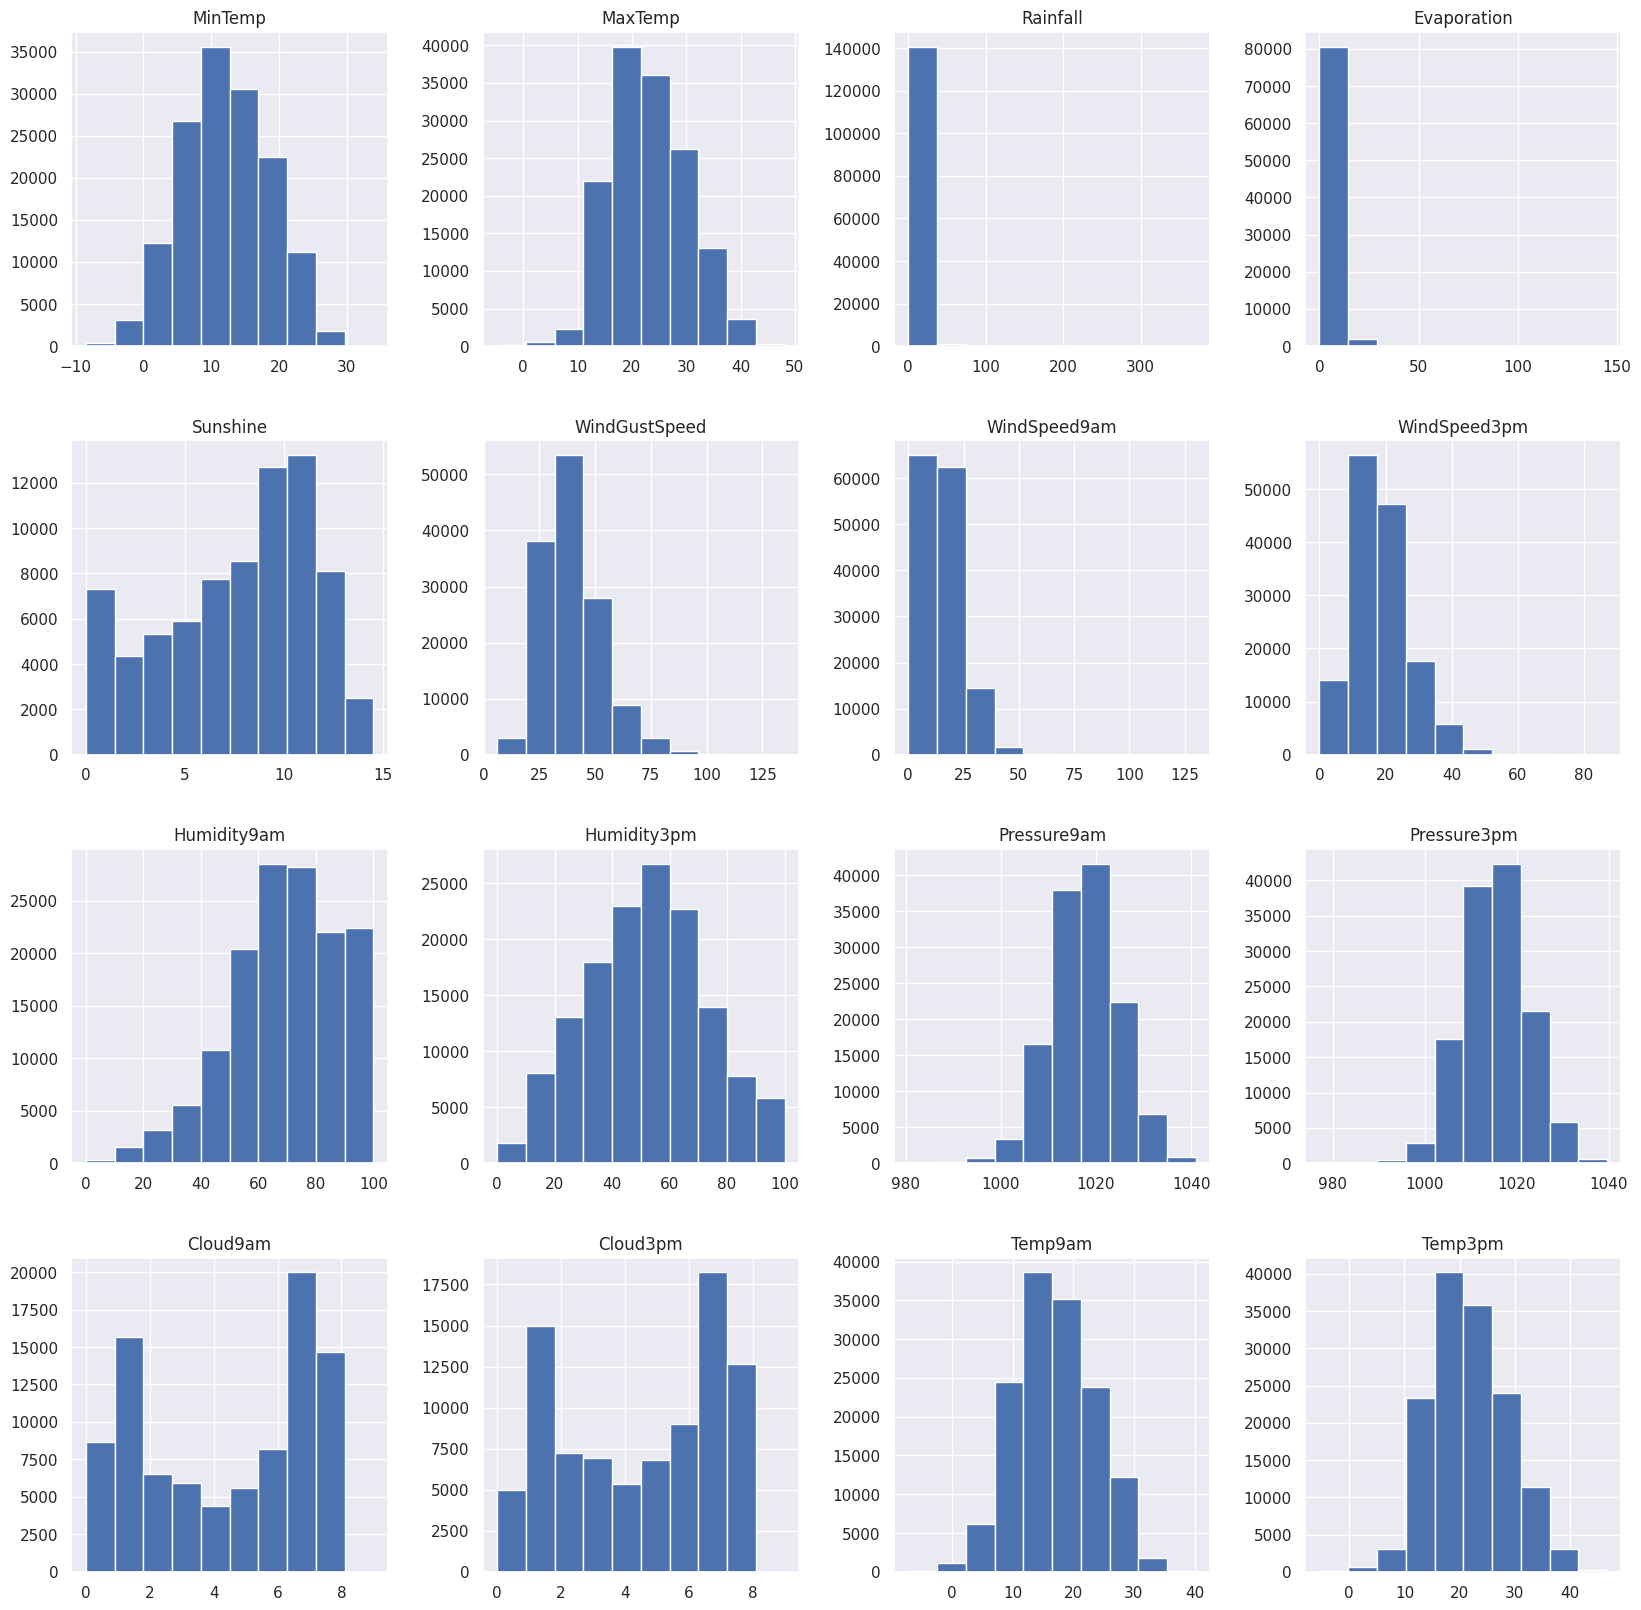

In [ ]:
df.hist(figsize=(20, 20)) 
plt.show()

Analisis

- Sebagian besar fitur terdistribusi secara normal seperti yang diharapkan.
- Distribusi Sunshine menarik tetapi sebagian besar dapat dijelaskan:
- Frekuensi tinggi nilai 0 mewakili hari-hari di mana mendung sepanjang hari
- Penurunan frekuensi yang tiba-tiba setelah sekitar 11 jam merupakan cerminan dari terbatasnya jumlah hari dalam setahun di mana cahaya padam selama berjam-jam atau lebih lama
- Distribusi Humidity9am sangat menarik karena lonjakan frekuensi yang besar
- Konsentrasi titik tertinggi untuk MinTemp adalah antara 10 hingga 12 derajat Celcius
- Konsentrasi titik tertinggi untuk MaxTemp adalah antara 18 hingga 22 derajat Celcius
- Kecepatan WindGustSpeed berkisar dari 0 hingga hampir 140 km/jam. Konsentrasi tertinggi adalah antara 38-40 km/jam
- Kecepatan angin maksimum pada pukul 09.00 (WindSpeed9am) berkisar antara 10 hingga 20 km/jam sedangkan pada pukul 15.00 berkisar antara 15 hingga 22 km/jam
- Konsentrasi titik tertinggi untuk kelembapan pada pukul 09.00 (Humidity9am) adalah antara 60-80% sedangkan pada pukul 15.00 adalah 40-70%
- Konsentrasi titik tertinggi untuk tekanan pada pukul 09:00 (Pressure9am) adalah antara 1015-1018 hpa dan pada pukul 15:00 antara 1015-1017 hpa
- Suhu maksimum pada jam 9 pagi (Temp9am) adalah antara 16-18 derajat Celcius dan pada jam 3 sore antara 21-23 derajat Celcius

# 5.Pre Prosessing

## 5.1. Data Cleaning

menghitung jumlah baris yang duplikat dalam DataFrame df

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Output menunjukkan jumlah nilai null pada setiap kolom dalam DataFrame. Kolom 'Evaporation', 'Sunshine', 'Cloud9am', dan 'Cloud3pm' memiliki jumlah nilai null yang sangat besar, yang mungkin memerlukan perhatian lebih dalam pengolahan data. Kolom 'Date' dan 'Location' tidak memiliki nilai null, sedangkan kolom lainnya memiliki jumlah nilai null yang bervariasi. Kolom 'RainTomorrow' memiliki nilai null pada 3267 baris, yang mungkin memerlukan penanganan khusus karena merupakan target prediksi dari model. Analisis output ini dapat membantu untuk mengevaluasi kualitas data dan menentukan strategi pra-pemrosesan data yang diperlukan untuk pengolahan lebih lanjut.

In [ ]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


Output menunjukkan jumlah nilai null pada setiap kolom dalam DataFrame beserta persentase dari total jumlah baris yang memiliki nilai null. Kolom 'Evaporation', 'Sunshine', 'Cloud9am', dan 'Cloud3pm' memiliki persentase nilai null yang sangat besar, yaitu lebih dari 38%. Kolom 'RainTomorrow' memiliki persentase nilai null sebesar 2.25%, yang mungkin memerlukan penanganan khusus karena merupakan target prediksi dari model. Analisis output ini dapat membantu untuk mengevaluasi kualitas data dan menentukan strategi pra-pemrosesan data yang diperlukan untuk pengolahan lebih lanjut.

Text(0.5, 1.0, 'Missing Value Position')

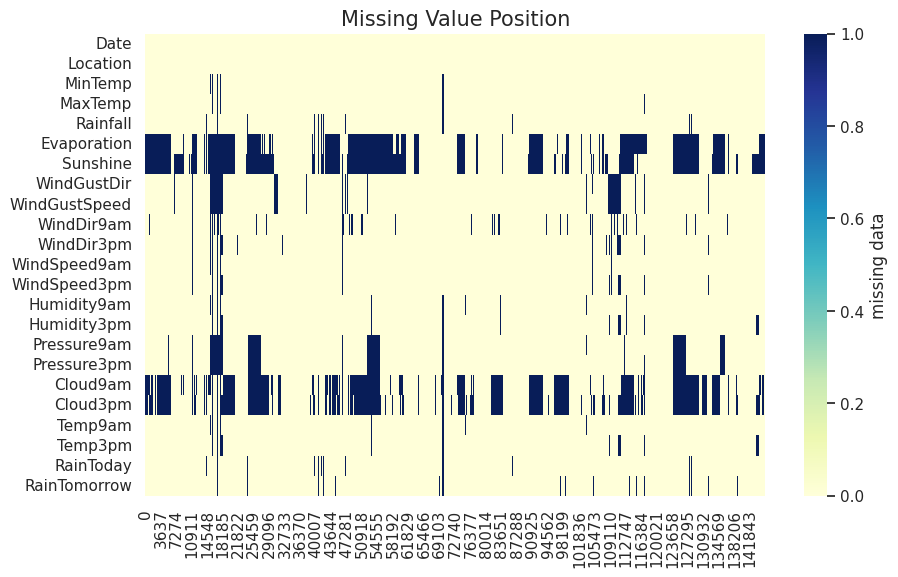

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull().transpose(),
           cmap='YlGnBu',
           cbar_kws={'label':'missing data'})
plt.title('Missing Value Position', fontsize=15)

Kode di atas akan membuat sebuah heatmap (peta panas) yang menunjukkan lokasi dan jumlah data yang hilang (missing data) pada DataFrame. Warna hijau muda pada heatmap menunjukkan area dengan data yang lengkap, sedangkan warna kuning-kebiruan menunjukkan area dengan data yang hilang. Dari heatmap ini, kita dapat melihat bahwa kolom 'Evaporation', 'Sunshine', 'Cloud9am', dan 'Cloud3pm' memiliki sejumlah besar data yang hilang (warna kuning-kebiruan yang lebar), sedangkan kolom-kolom lainnya memiliki jumlah data yang hilang yang lebih sedikit. Analisis visual ini dapat membantu kita memahami secara lebih detail mengenai distribusi data yang hilang pada DataFrame dan mempertimbangkan strategi pra-pemrosesan data yang tepat untuk mengatasi masalah tersebut.

In [ ]:
missing_val = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val[missing_val['persentase_nan(%)']>30]

,missing_count,total_count,persentase_nan(%)
Evaporation,62790,145460,43.166506
Sunshine,69835,145460,48.009762
Cloud9am,55888,145460,38.421559
Cloud3pm,59358,145460,40.807095


Dari hasil perhitungan nilai missing_count pada setiap kolom dalam DataFrame "df", terdapat empat kolom yaitu "Evaporation", "Sunshine", "Cloud9am", dan "Cloud3pm" yang memiliki nilai missing_count lebih dari 30% dari total jumlah data. Hal ini menunjukkan bahwa kolom-kolom tersebut memiliki jumlah data yang hilang yang signifikan dan dapat berdampak pada analisis atau pemodelan yang dilakukan. Oleh karena itu, perlu dilakukan penanganan terhadap nilai yang hilang tersebut, seperti imputasi data atau penghapusan baris/kolom tertentu, untuk memastikan akurasi dan validitas analisis yang dilakukan. Selain itu, perlu juga dilakukan evaluasi terhadap penyebab dan sumber dari nilai yang hilang tersebut agar dapat mengambil tindakan pencegahan atau perbaikan yang tepat di masa depan.

In [ ]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

menghapus kolom "Evaporation", "Sunshine", "Cloud9am", dan "Cloud3pm" dari DataFrame "df" secara permanen dengan menggunakan fungsi drop() dan menetapkan parameter axis=1 untuk menghapus kolom dan inplace=True untuk memodifikasi DataFrame yang ada.

In [ ]:
#Manampilkan 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

memisahkan semua kolom pada DataFrame ke dalam dua kelompok, yaitu kolom kategorikal (categorical) dan kolom numerikal (numerical) berdasarkan tipe datanya

In [ ]:
for col in numerical:
    df[col].fillna(df[col].mean(), inplace=True)

melakukan imputasi data pada nilai-nilai yang hilang pada setiap kolom numerik dalam DataFrame "df" dengan menggunakan rata-rata dari nilai yang tersedia dalam setiap kolom, yang diperoleh melalui fungsi mean(). Dengan cara ini, nilai yang hilang dapat diisi dengan nilai yang relatif representatif dan dapat mempertahankan keutuhan data dalam analisis atau pemodelan yang dilakukan. Namun, perlu diingat bahwa imputasi data menggunakan rata-rata dapat mengakibatkan bias pada hasil analisis atau prediksi, terutama jika terdapat outlier atau perbedaan yang signifikan pada distribusi data.

In [ ]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
WindGustDir,10326,7.1 %
WindGustSpeed,0,0.0 %
WindDir9am,10566,7.26 %
WindDir3pm,4228,2.91 %
WindSpeed9am,0,0.0 %


In [ ]:
df.dropna(subset=['RainToday','RainTomorrow'], axis=0, inplace=True)

terdapat missing value pada kolom 'RainToday' dan 'RainTomorrow' dengan presentase yang tidak terlalu signifikan yaitu 2.24% dan 2.25% masing-masingnya. Namun, karena kedua kolom tersebut merupakan kolom target dalam analisis prediksi cuaca besok, maka ketidaklengkapan data pada kedua kolom tersebut dapat mempengaruhi akurasi dan keandalan hasil prediksi. Oleh karena itu, dapat diputuskan untuk menghapus baris yang mengandung missing value pada kedua kolom tersebut dengan menggunakan method dropna. Penghapusan baris yang mengandung missing value pada kedua kolom tersebut dapat meningkatkan kualitas dan keandalan hasil analisis prediksi cuaca besok.

In [ ]:
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm'], axis=0, inplace=True)


menghapus baris-baris yang memiliki nilai kosong (missing value) pada kolom 'WindGustDir', 'WindDir9am', dan 'WindDir3pm' dengan menggunakan fungsi dropna. Hal ini dilakukan karena persentase missing value pada kolom-kolom tersebut relatif kecil, yaitu antara 2.91% - 7.26%. Dalam kasus ini, penghapusan missing value di kolom-kolom tersebut tidak terlalu mempengaruhi kualitas data secara signifikan. Sebaliknya, jika missing value tersebut dibiarkan, maka akan berdampak pada ketidakakuratan analisis yang akan dilakukan.

In [ ]:
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage
nan_sum

,nan_sum,percentage
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,0,0.0


Dataframe telah clean dan akan dilakukan pre prosessing lanjutan untuk modelling

# 6.Exploratory Data Analysis (EDA)

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

Kode tersebut mengubah nilai 'Yes' dan 'No' pada kolom 'RainTomorrow' dan 'RainToday' menjadi nilai biner 1 dan 0. Hal ini dilakukan untuk memudahkan proses pemrosesan data dan analisis statistik pada dataset weatherAUS.

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   WindGustDir    123710 non-null  object 
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  object 
 8   WindDir3pm     123710 non-null  object 
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity9am    123710 non-null  float64
 12  Humidity3pm    123710 non-null  float64
 13  Pressure9am    123710 non-null  float64
 14  Pressure3pm    123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  Temp3pm        123710 non-null  float64
 17  RainToday      123710 non-nul

Membuat gambar (figure) dengan ukuran 18 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_corr) dengan rotasi 90

<ipython-input-32-b8232c1013b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


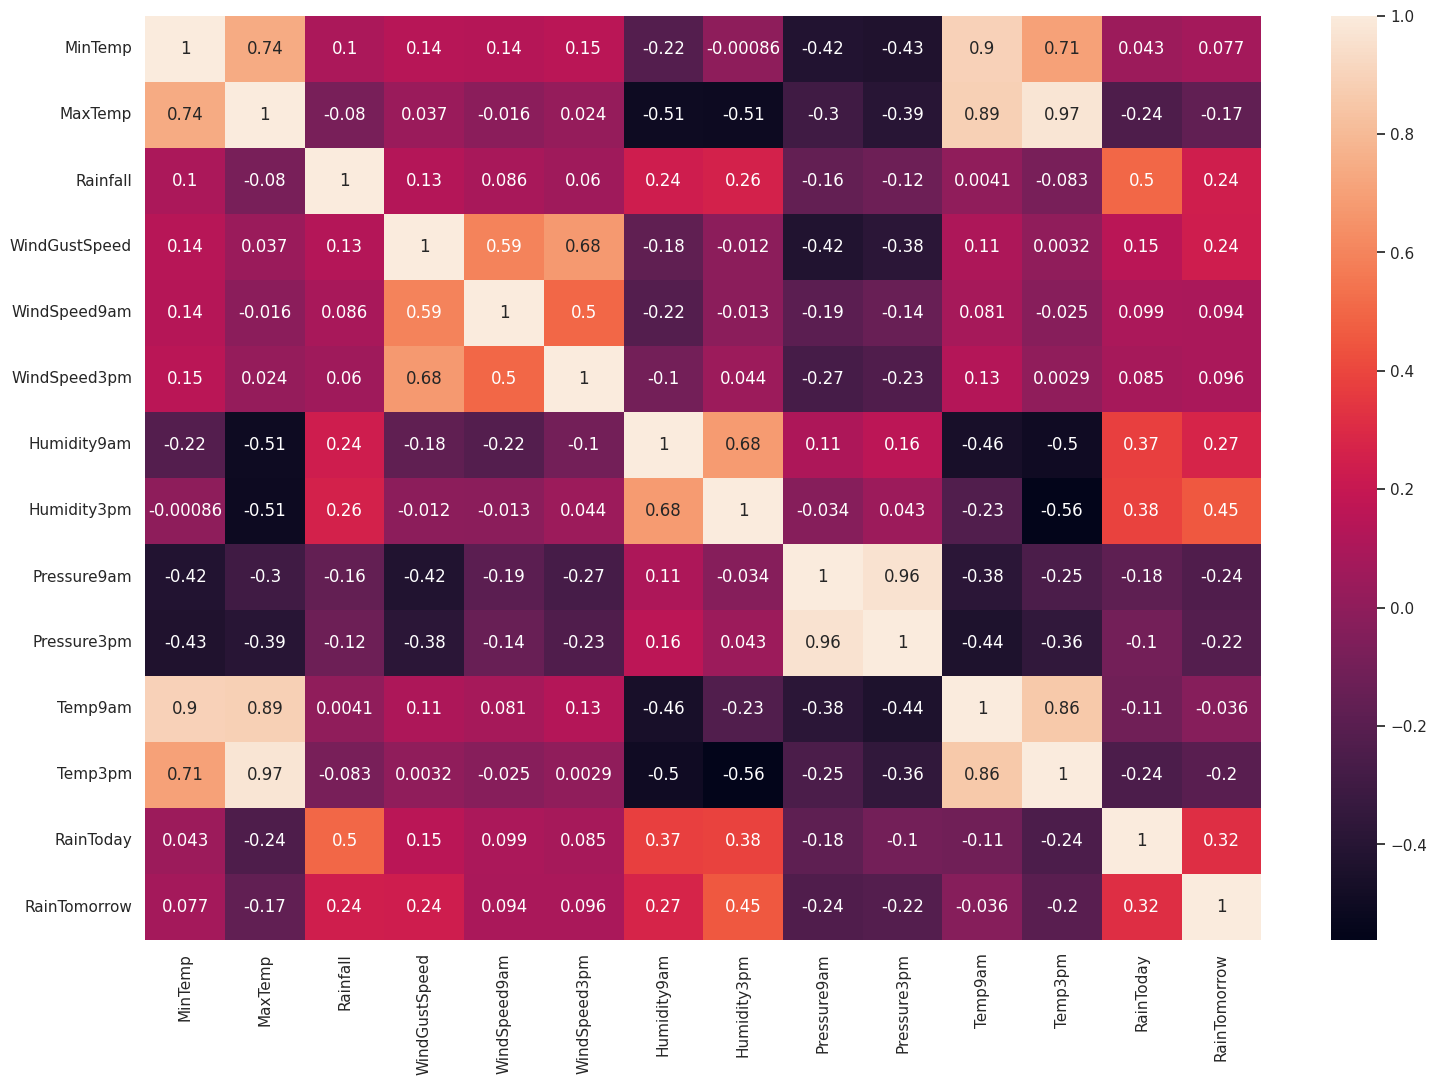

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Feature Humidity3pm dan RainToday memiliki korelasi tinggi, sedangkan MinTemp, Evaporation, WindSpeed9am, WindSpeed3pm, dan Temp9am memiliki korelasi sangat rendah

## 6.1. Korelasi WindGustDir, WindDir9am, dan WindDir3pm dengan Target

In [ ]:
from sklearn.preprocessing import LabelEncoder

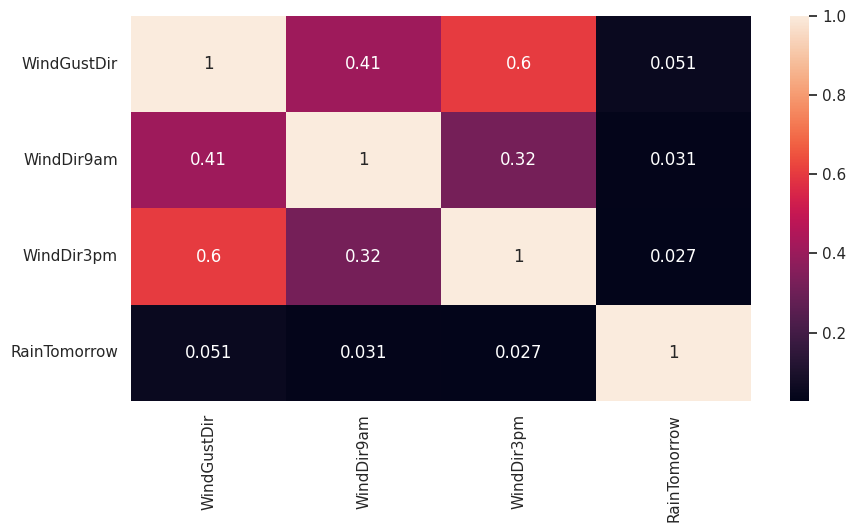

In [ ]:
dff = df.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

WindGustDir, WindDir9am, dan WindDir3pm memiliki korelasi yang lemah

## 6.2. Distribusi Lokasi Terjadinya Hujan

In [ ]:
df_lochujan = df.groupby(by='Location').sum()
df_lochujan = df_lochujan[['RainToday']]
df_lochujan.head()

<ipython-input-35-7b9fb433fc53>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_lochujan = df.groupby(by='Location').sum()


,RainToday
Location,
Adelaide,635
Albury,558
AliceSprings,231
BadgerysCreek,524
Ballarat,750


Bagan di atas berguna untuk memeriksa dengan cepat perbedaan antar lokasi sehubungan dengan jumlah hari hujan tetapi memiliki satu masalah utama: jumlah pengamatan dari setiap lokasi tidak persis sama. Memeriksa jumlah nilai untuk setiap lokasi (di bawah) mengungkapkan bahwa lokasi Katherine, Nhil, dan Uluru harus diabaikan saat menganalisis plot di atas. Lokasi yang tersisa memiliki jumlah nilai yang cukup dekat untuk dapat dibandingkan dengan benar.

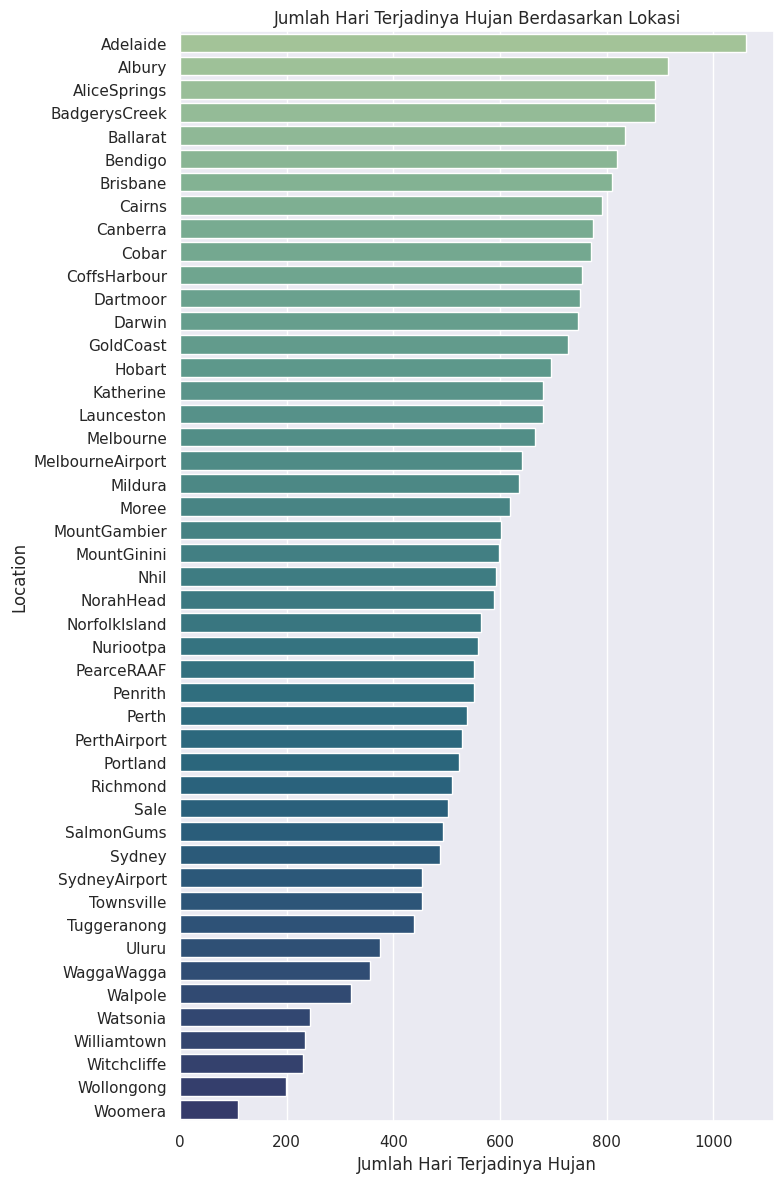

In [ ]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_lochujan.index, 
            data=df_lochujan.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Jumlah Hari Terjadinya Hujan')
plt.title('Jumlah Hari Terjadinya Hujan Berdasarkan Lokasi')
plt.tight_layout()

Wilayah yang paling sering terjadi hujan adalah Adelaide dan yang paling jarang terjadi hujan adalah Woomera. Berdasakan plot di atas, dapat diasumsikan bahwa lokasi cukup mempengaruhi prediksi turunnya hujan

# 7.Pre Prosessing

In [ ]:
df.drop(['MinTemp','WindSpeed9am','WindSpeed3pm',
                 'Temp9am', 'WindGustDir','WindDir9am','WindDir3pm'], axis=1, inplace=True)

Feature yang memiliki nilai koefisien korelasi rendah terhadap kolom target atau RainTomorrow adalah MinTemp, Evaporation, WindSpeed9am, WindSpeed3pm, Temp9am, WindGustDir, WindDir9am, WindDir3pm

In [ ]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

Kolom 'Temp3pm' dan 'Pressure3pm' dihapus karena memiliki korelasi tinggi dengan kolom lainnya dalam dataframe, yaitu 'MaxTemp' dan 'Pressure9am' secara berturut-turut. Oleh karena itu, menghapus kolom-kolom ini tidak akan mempengaruhi hasil prediksi model dan dapat meningkatkan efisiensi dalam pemrosesan data. Korelasi tinggi antara dua fitur dapat menimbulkan masalah multicollinearity dalam pemodelan, yang dapat menyebabkan variansi yang lebih tinggi dalam estimasi koefisien regresi. Dengan menghapus salah satu fitur, multicollinearity dapat diminimalkan dan hasil pemodelan dapat lebih akurat dan stabil.

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

menghapus kolom "Date" dari DataFrame "df" secara permanen dengan menggunakan fungsi drop() dan menetapkan parameter axis=1 untuk menghapus kolom dan inplace=True untuk memodifikasi DataFrame yang ada. Dengan demikian, kolom "Date" tidak akan lagi digunakan dalam analisis atau pemodelan selanjutnya.

In [ ]:
#Menampilkan 5 data teratas
df.head()

,Location,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,22.9,0.6,44.0,71.0,22.0,1007.7,0,0
1,Albury,25.1,0.0,44.0,44.0,25.0,1010.6,0,0
2,Albury,25.7,0.0,46.0,38.0,30.0,1007.6,0,0
3,Albury,28.0,0.0,24.0,45.0,16.0,1017.6,0,0
4,Albury,32.3,1.0,41.0,82.0,33.0,1010.8,0,0


In [ ]:
#Menampilkan ukuran dataframe
df.shape

(123710, 9)

## 7.1. Scaling Dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = ['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am']

In [ ]:
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   WindGustSpeed  123710 non-null  float64
 3   Humidity9am    123710 non-null  float64
 4   Humidity3pm    123710 non-null  float64
 5   Pressure9am    123710 non-null  float64
dtypes: float64(6)
memory usage: 6.6 MB


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

 feature scaling menggunakan StandardScaler dari library sklearn. Hal ini dilakukan agar setiap fitur pada dataset memiliki rentang nilai yang serupa, sehingga tidak ada satu fitur pun yang dominan dan mempengaruhi hasil prediksi. Dalam hal ini, setiap fitur pada dataset diubah menjadi memiliki nilai mean=0 dan standar deviasi=1. Hasilnya ditampung pada variabel scaled_features dan ditampilkan dalam bentuk dataframe pada variabel df_feat. Dapat dilihat bahwa setiap fitur pada dataset telah diubah menjadi memiliki nilai yang relatif serupa, dengan nilai mean mendekati 0 dan nilai standar deviasi mendekati 1. Hal ini akan memudahkan proses modeling dan meningkatkan akurasi prediksi.

In [ ]:
df_scaled = pd.DataFrame(data_scaled, columns=columns)

In [ ]:
df_scaled.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am
0,-0.079769,-0.208215,0.247578,0.175790,-1.384723,-1.436179
1,0.225537,-0.278572,0.247578,-1.247103,-1.240765,-1.007544
2,0.308803,-0.278572,0.396959,-1.563302,-1.000836,-1.450960
3,0.627987,-0.278572,-1.246232,-1.194403,-1.672638,0.027092
4,1.224723,-0.161311,0.023507,0.755487,-0.856878,-0.977983


In [ ]:
df.head()

,Location,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,22.9,0.6,44.0,71.0,22.0,1007.7,0,0
1,Albury,25.1,0.0,44.0,44.0,25.0,1010.6,0,0
2,Albury,25.7,0.0,46.0,38.0,30.0,1007.6,0,0
3,Albury,28.0,0.0,24.0,45.0,16.0,1017.6,0,0
4,Albury,32.3,1.0,41.0,82.0,33.0,1010.8,0,0


In [ ]:
df.reset_index(drop=True,inplace=True)

Mereset index dari Dataframe df

In [ ]:
df_scaled['Location'] = df['Location']
df_scaled['RainToday'] = df['RainToday']
df_scaled['RainTomorrow'] = df['RainTomorrow']

Menambahkan 3 kolom untuk df_scaled dari sumber kolom df

In [ ]:
df_scaled.isnull().sum()

MaxTemp          0
Rainfall         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Location         0
RainToday        0
RainTomorrow     0
dtype: int64

Melakukan pengecekan dataframe df_scaled dan dinyatakan tidak ada missing values

In [ ]:
weather_new = df_scaled

Membuat dataframe daru untuk modelling

In [ ]:
weather_new.shape

(123710, 9)

melihat ukuran dataframe untuk modelling dan terdapat 123.710 baris data dan 9 kolom

In [ ]:
weather_new.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Location,RainToday,RainTomorrow
0,-0.079769,-0.208215,0.247578,0.175790,-1.384723,-1.436179,Albury,0,0
1,0.225537,-0.278572,0.247578,-1.247103,-1.240765,-1.007544,Albury,0,0
2,0.308803,-0.278572,0.396959,-1.563302,-1.000836,-1.450960,Albury,0,0
3,0.627987,-0.278572,-1.246232,-1.194403,-1.672638,0.027092,Albury,0,0
4,1.224723,-0.161311,0.023507,0.755487,-0.856878,-0.977983,Albury,0,0


In [ ]:
weather_new['Location']

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
123705     Uluru
123706     Uluru
123707     Uluru
123708     Uluru
123709     Uluru
Name: Location, Length: 123710, dtype: object

Melihat isi dari kolom lokasi pada dataframe weather_new

# 8.Modeling

## 8.1. Logistic Regression

In [ ]:
# menentukan feature
X_weather = weather_new.drop(['Location', 'RainTomorrow'], axis=1)
y_weather = weather_new['RainTomorrow']

In [ ]:
# split dataset
XWeather_train, XWeather_test, yWeather_train, yWeather_test = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

### 8.1.1.Melatih Model Logistic Regression

In [ ]:
model_weather = LogisticRegression(solver='liblinear', C=0.5, multi_class='ovr', random_state=42)

In [ ]:
model_weather.fit(XWeather_train, yWeather_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=42,
                   solver='liblinear')

### 8.1.2.Evaluation Metrics

#### 8.1.2.1 Accuracy, Precision, dan Recall

In [ ]:
yWeather_pred = model_weather.predict(XWeather_test)

print(f'Accuracy Score Weather Logistic Regression: {metrics.accuracy_score(yWeather_test, yWeather_pred)}')
print(f'Precision Weather Logistic Regression: {metrics.precision_score(yWeather_test, yWeather_pred)}')
print(f'Recall Weather Logistic Regression: {metrics.recall_score(yWeather_test, yWeather_pred)}')

Accuracy Score Weather Logistic Regression: 0.8407161910920702
Precision Weather Logistic Regression: 0.715177304964539
Recall Weather Logistic Regression: 0.46189080249175524


#### 8.1.2.2 Confusion Matrix

In [ ]:
cmatrix = confusion_matrix(yWeather_test, yWeather_pred)
cmatrix

array([[18280,  1004],
       [ 2937,  2521]])

In [ ]:
tn, fp, fn, tp = cmatrix.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 18280
False Positive : 1004
False Negative : 2937
True Positive  : 2521


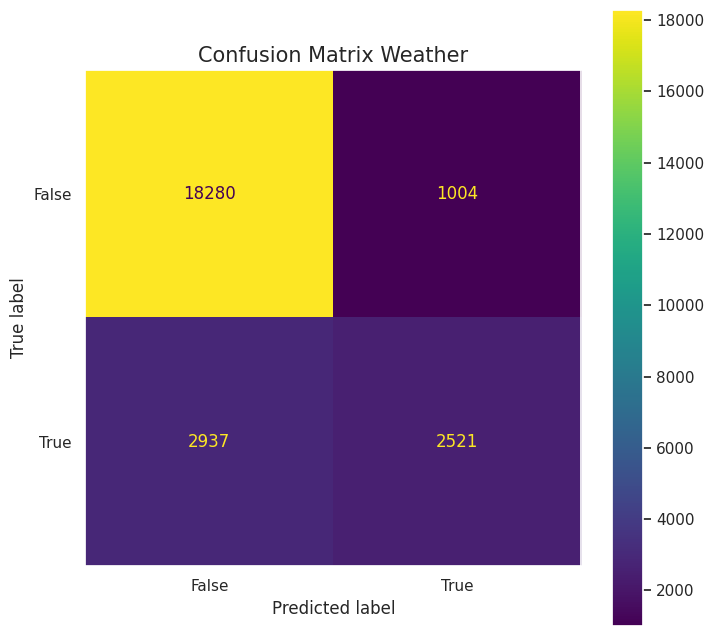

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix Weather', size=15)

plt.show()

In [ ]:
print(f'Classification Report:\n{classification_report(yWeather_test, yWeather_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19284
           1       0.72      0.46      0.56      5458

    accuracy                           0.84     24742
   macro avg       0.79      0.70      0.73     24742
weighted avg       0.83      0.84      0.83     24742



#### 8.1.2.3 ROC

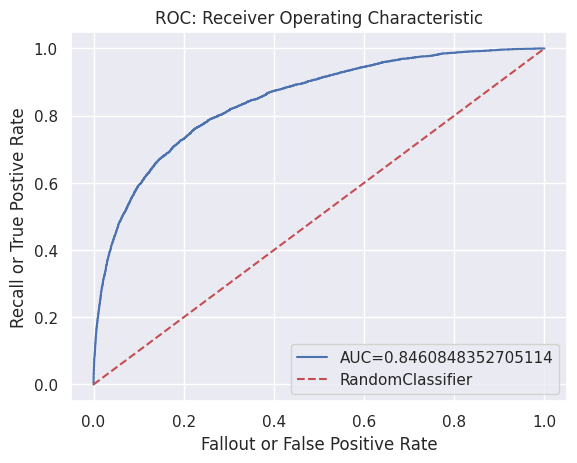

In [ ]:
prob_estimates = model_weather.predict_proba(XWeather_test)

fpr, tpr, threshold = roc_curve(yWeather_test, prob_estimates[:,1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='RandomClassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Postive Rate')
plt.legend()
plt.show()

### 8.1.3 Analisis Model Logistic Regression 
1. Dengan menggunakan model Logistic Regression didapatkan accuracy score sebesar 0.84, precision score 0.71, dan recall score sebesar 0.46
2. Dari confusion matrix yang dihasilkan dari 20% data pengujian, didapatkan kesimpulan sebagai berikut:
    - Data bahwa model memprediksi negatif dan kenyataannya memang negatif(TN) sebanyak 18280
    - Data bahwa model memprediksi positif dan kenyatannya negatif(FP) sebanyak 1004
    - Data bahwa model memprediksi negatif dan kenyataanya positif(FN) sebanyak 2937
    - Data bahwa model memprediksi negatif fan kenyataanya memang positif(TP) sebanyak 2521
3. Dari ROC, dihasillkan nilai AUC adalah 0.85 yang menandakan bahwa model klasifikasi memiliki performa yang cukup baik untuk memprediksi label atau kelas dari suatu data. Dengan nilai 0.85 menunjukkan bahwa model dapat membedakan antara dua kelas dengan akurasi sekitar 85%.

## 8.2 SVM

In [ ]:
# menentukan feature
X_weather = weather_new.drop(['Location', 'RainTomorrow'], axis=1)
y_weather = weather_new['RainTomorrow']

In [ ]:
# split dataset
XWeather_train, XWeather_test, yWeather_train, yWeather_test = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

### 8.2.1 Melatih Model SVM

In [ ]:
svm_modelWeather = svm.SVC(kernel='linear')
svm_modelWeather.fit(XWeather_train, yWeather_train)

SVC(kernel='linear')

### 8.2.2. Evaluation Metrics

#### 8.2.2.1.Accuracy, Precision, dan Recall

In [ ]:
yWeather_svm_pred = svm_modelWeather.predict(XWeather_test)

print(f'Accuracy Score Weather SVM: {metrics.accuracy_score(yWeather_test, yWeather_svm_pred)}')
print(f'Precision Weather SVM: {metrics.precision_score(yWeather_test, yWeather_svm_pred)}')
print(f'Recall Weather SVM: {metrics.recall_score(yWeather_test, yWeather_svm_pred)}')

Accuracy Score Weather SVM: 0.8406353568830329
Precision Weather SVM: 0.7324332617367291
Recall Weather SVM: 0.43733968486625135


#### 8.2.2.2 Confusion Matrix

In [ ]:
cmatrix = confusion_matrix(yWeather_test, yWeather_svm_pred)
cmatrix

array([[18412,   872],
       [ 3071,  2387]])

In [ ]:
tn, fp, fn, tp = cmatrix.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 18412
False Positive : 872
False Negative : 3071
True Positive  : 2387


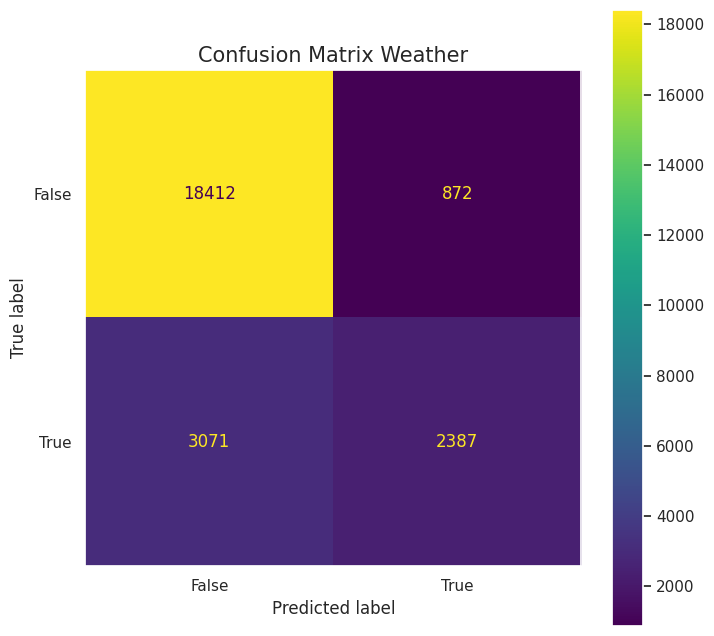

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix Weather', size=15)

plt.show()

In [ ]:
print(f'Classification Report:\n{classification_report(yWeather_test, yWeather_svm_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19284
           1       0.73      0.44      0.55      5458

    accuracy                           0.84     24742
   macro avg       0.79      0.70      0.73     24742
weighted avg       0.83      0.84      0.82     24742



#### 8.2.2.3 ROC

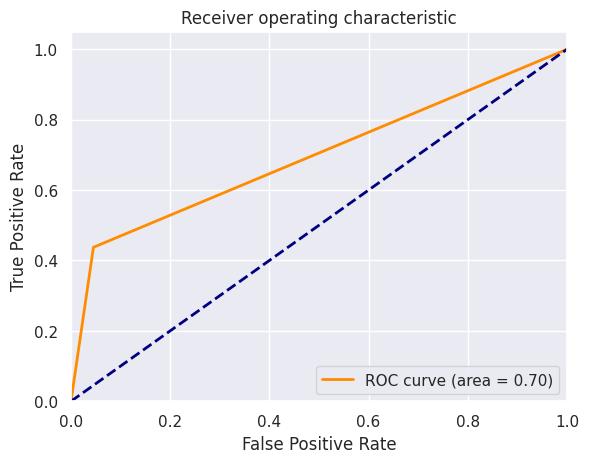

In [ ]:
from sklearn.metrics import roc_curve, auc

# Memprediksi kelas pada data uji
yWeather_pred = svm_modelWeather.predict(XWeather_test)

# Menghitung nilai FPR, TPR, dan AUC
fpr, tpr, thresholds = roc_curve(yWeather_test, yWeather_pred)
roc_auc = auc(fpr, tpr)

# Menampilkan kurva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### 8.2.3 Analisis Model SVM 
1. Dengan menggunakan model SVM didapatkan accuracy score sebesar 0.84, precision score 0.73, dan recall score sebesar 0.43
2. Dari confusion matrix yang dihasilkan dari 20% data pengujian, didapatkan kesimpulan sebagai berikut:
    - Data bahwa model memprediksi negatif dan kenyataannya memang negatif(TN) sebanyak 18412
    - Data bahwa model memprediksi positif dan kenyatannya negatif(FP) sebanyak 872
    - Data bahwa model memprediksi negatif dan kenyataanya positif(FN) sebanyak 3071
    - Data bahwa model memprediksi negatif fan kenyataanya memang positif(TP) sebanyak 2387
3. Dari ROC, dihasillkan nilai AUC adalah 0.70 yang menandakan bahwa model klasifikasi memiliki performa yang cukup baik untuk memprediksi label atau kelas dari suatu data. Dengan nilai 0.70 menunjukkan bahwa model dapat membedakan antara dua kelas dengan akurasi sekitar 70%.

# 9.Pre Prosessing (Handling Imbalance Dataframe)

In [ ]:
df_imbalance = df_scaled

### 9.1 Membuat dataframe baru df_imbalance yang bersumber dari df_scaled

In [ ]:
encode = LabelEncoder()
df_imbalance['Location'] = encode.fit_transform(df_imbalance['Location'].values) 

melakukan proses encoding pada kolom "Location" dalam DataFrame "df_imbalance" dengan menggunakan LabelEncoder() untuk mengubah nilai pada kolom menjadi bilangan bulat yang terurut berdasarkan abjad atau urutan kemunculan. Dengan cara ini, nilai kategorikal pada kolom "Location" dapat digunakan sebagai input pada pemodelan atau analisis yang memerlukan nilai numerik.

In [ ]:
x_imbalance = df_imbalance.drop(['RainTomorrow'],axis=1)
y_imbalance = df_imbalance['RainTomorrow']

memisahkan kolom target "RainTomorrow" dari DataFrame "df_imbalance" dan menetapkan variabel "x_imbalance" sebagai DataFrame dengan kolom-kolom lainnya yang merupakan fitur atau input pada pemodelan, serta variabel "y_imbalance" sebagai Series dengan nilai-nilai pada kolom target "RainTomorrow". Dengan cara ini, data dapat disiapkan dalam format yang sesuai untuk pemodelan atau analisis selanjutnya.

In [ ]:
print(x_imbalance.shape)
print(y_imbalance.shape)

(123710, 8)
(123710,)


DataFrame "x_imbalance" memiliki dimensi (jumlah baris, jumlah kolom) sebesar (123710, 8), yang berarti terdapat 123710 baris dan 8 kolom fitur atau input pada pemodelan. Sementara itu, variabel "y_imbalance" memiliki dimensi (jumlah baris,) sebesar (123710,), yang berarti terdapat 123710 nilai pada kolom target "RainTomorrow".

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
x_imbalance_sampling, y_imbalance_sampling = sm.fit_resample(x_imbalance,y_imbalance)

menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk melakukan oversampling pada data yang tidak seimbang dengan membuat data sintetis pada kelas minoritas agar memiliki jumlah yang setara dengan kelas mayoritas. Dalam implementasinya, SMOTE menggunakan parameter random_state=30 untuk memastikan hasil sampling dapat direproduksi dengan konsisten. Variabel "x_imbalance_sampling" dan "y_imbalance_sampling" merupakan hasil dari oversampling dengan SMOTE pada variabel "x_imbalance" dan "y_imbalance".

In [ ]:
print(x_imbalance_sampling.shape)
print(y_imbalance_sampling.shape)

(192636, 8)
(192636,)


Hasil output tersebut menunjukkan bahwa setelah melakukan oversampling dengan SMOTE, DataFrame "x_imbalance_sampling" memiliki dimensi (jumlah baris, jumlah kolom) sebesar (192636, 8), yang berarti terdapat 192636 baris dan 8 kolom fitur atau input pada pemodelan. Sementara itu, variabel "y_imbalance_sampling" memiliki dimensi (jumlah baris,) sebesar (192636,), yang berarti terdapat 192636 nilai pada kolom target "RainTomorrow". Dengan melakukan oversampling, data yang tidak seimbang dapat diatasi sehingga dapat digunakan untuk pemodelan atau analisis yang lebih baik dan akurat.

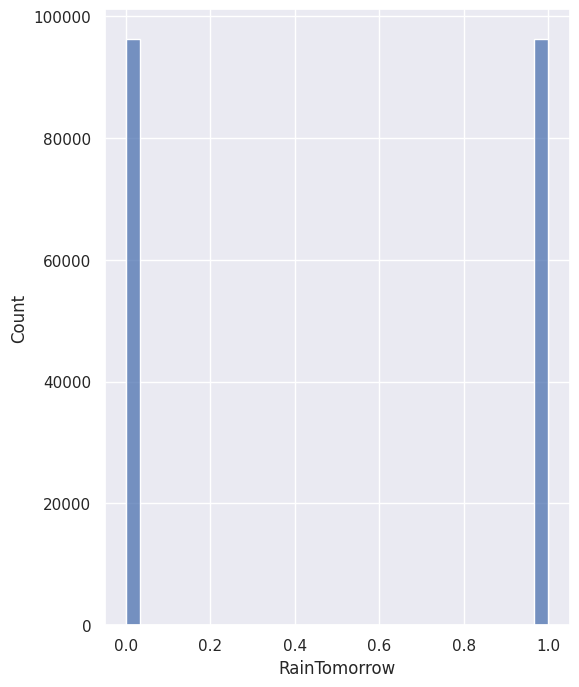

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_imbalance_sampling)
plt.show()

Dari visualisasi di atas bisa dilihat bahwa perbandingannya sama

In [ ]:
df_balanced = pd.concat([x_imbalance_sampling, y_imbalance_sampling], axis=1)
df_balanced['Location'] = encode.inverse_transform(df_balanced['Location'].values)
df_balanced.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Location,RainToday,RainTomorrow
0,-0.079769,-0.208215,0.247578,0.175790,-1.384723,-1.436179,Albury,0,0
1,0.225537,-0.278572,0.247578,-1.247103,-1.240765,-1.007544,Albury,0,0
2,0.308803,-0.278572,0.396959,-1.563302,-1.000836,-1.450960,Albury,0,0
3,0.627987,-0.278572,-1.246232,-1.194403,-1.672638,0.027092,Albury,0,0
4,1.224723,-0.161311,0.023507,0.755487,-0.856878,-0.977983,Albury,0,0


menggabungkan data hasil oversampling "x_imbalance_sampling" dan "y_imbalance_sampling" dengan menggunakan fungsi pd.concat() dengan parameter axis=1 yang berarti data digabungkan secara horizontal (kolom). Selanjutnya, nilai pada kolom "Location" yang sudah diencode sebelumnya dikembalikan ke bentuk semula dengan menggunakan inverse_transform() pada objek LabelEncoder. Terakhir, hasil gabungan data ditampilkan dengan menggunakan fungsi head() untuk melihat beberapa baris awal DataFrame.

In [ ]:
df_balanced.shape

(192636, 9)

Melihat ukuran dimensi df_balanced dan disini kita bisa lihat bahwa ukurannya adalah 192.636 baris data dan 9 kolom

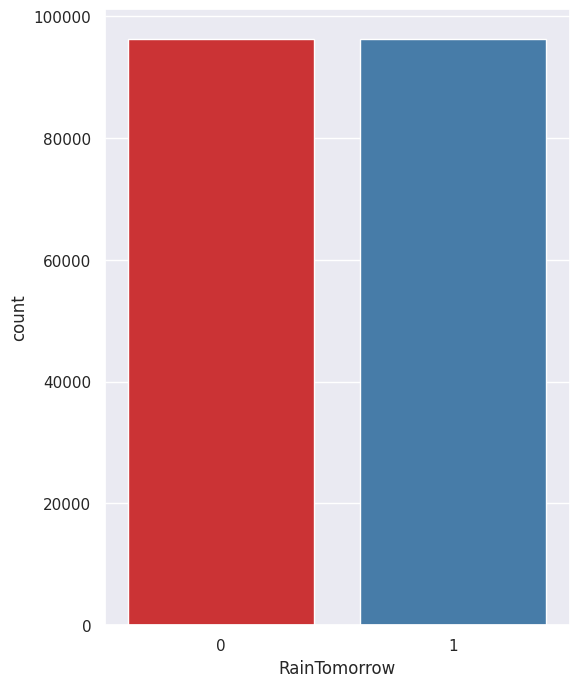

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df_balanced, palette="Set1")
plt.show()

Dari visualisasi di atas bisa dilihat bahwa perbandingannya sama

## 9.2 Modeling dengan Logistic Regression

In [ ]:
# menentukan feature
X_weather_balanced = df_balanced.drop(['Location', 'RainTomorrow'], axis=1)
y_weather_balanced = df_balanced['RainTomorrow']

In [ ]:
XWeather_balanced_train, XWeather_balanced_test, yWeather_balanced_train, yWeather_balanced_test = train_test_split(X_weather_balanced, y_weather_balanced, test_size=0.2, random_state=42)

## 9.3 Melatih Model Logistic Regression

In [ ]:
model_weather_balanced = LogisticRegression(solver='liblinear', C=0.5, multi_class='ovr', random_state=42)

In [ ]:
model_weather_balanced.fit(XWeather_balanced_train, yWeather_balanced_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [ ]:
yWeather_balanced_pred = model_weather_balanced.predict(XWeather_balanced_test)

## 9.4 Evaluation Metrics

### 9.4.1 Accuracy, Precision, dan Recall

In [ ]:
print(f'Accuracy Score Weather Logistic Regression: {metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_pred)}')
print(f'Precision Weather Logistic Regression: {metrics.precision_score(yWeather_balanced_test, yWeather_balanced_pred)}')
print(f'Recall Weather Logistic Regression: {metrics.recall_score(yWeather_balanced_test, yWeather_balanced_pred)}')

Accuracy Score Weather Logistic Regression: 0.7720359219269103
Precision Weather Logistic Regression: 0.7773202407348749
Recall Weather Logistic Regression: 0.763336616724558


### 9.4.2 Recall

In [ ]:
cmatrix = confusion_matrix(yWeather_balanced_test, yWeather_balanced_pred)
cmatrix

array([[15021,  4218],
       [ 4565, 14724]])

In [ ]:
tn, fp, fn, tp = cmatrix.ravel()
print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 15021
False Positive : 4218
False Negative : 4565
True Positive  : 14724


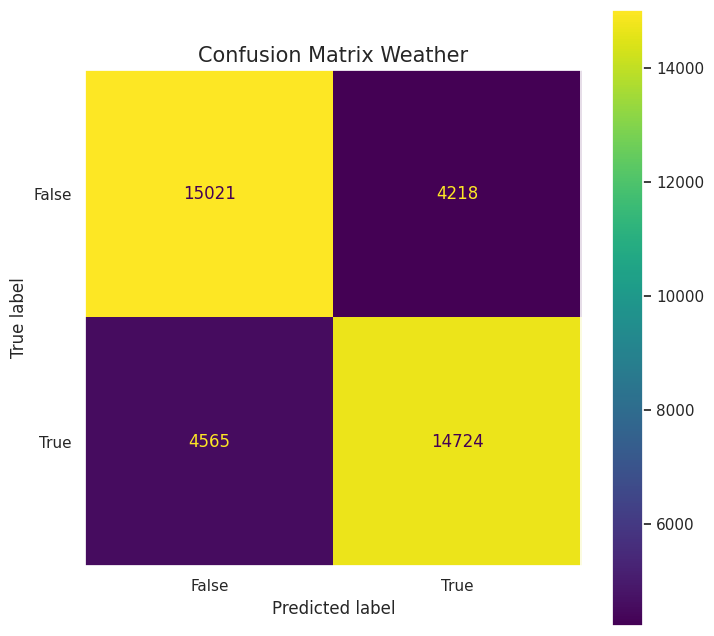

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix Weather', size=15)

plt.show()

In [ ]:
print(f'Classification Report:\n{classification_report(yWeather_balanced_test, yWeather_balanced_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     19239
           1       0.78      0.76      0.77     19289

    accuracy                           0.77     38528
   macro avg       0.77      0.77      0.77     38528
weighted avg       0.77      0.77      0.77     38528



**Analisis Resampling terhadap Score Recall** : Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.46. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.76, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar. Hal ini disebabkan karena SMOTE melakukan oversampling pada sampel-sampel pada kelas minoritas sehingga membuat model memiliki lebih banyak data untuk dipelajari pada kelas minoritas. Namun, perlu diingat bahwa SMOTE dapat memperkenalkan noise pada data dan peningkatan recall pada kelas minoritas dapat dikompromikan dengan penurunan precision pada kelas minoritas atau peningkatan false positive rate pada kelas mayoritas. Oleh karena itu, evaluasi yang cermat perlu dilakukan untuk memilih model terbaik.

### 9.4.3 ROC


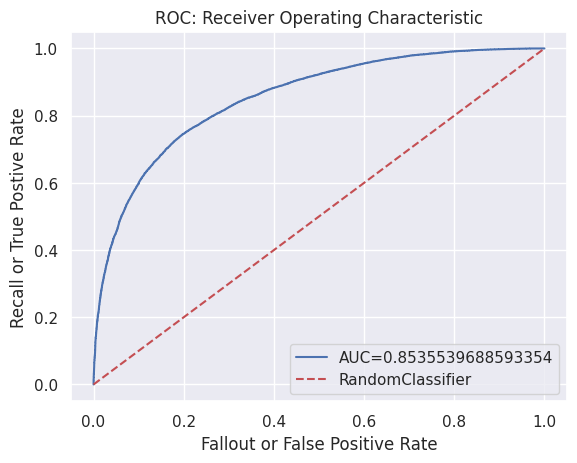

In [ ]:
prob_estimates = model_weather_balanced.predict_proba(XWeather_balanced_test)

fpr, tpr, threshold = roc_curve(yWeather_balanced_test, prob_estimates[:,1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='RandomClassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Postive Rate')
plt.legend()
plt.show()

## 9.5 Analisis Model Logistic Regression 
1. Dengan menggunakan model Logistic Regression didapatkan accuracy score sebesar 0.77, precision score 0.77, dan recall score sebesar 0.76
2. Dari confusion matrix yang dihasilkan dari 20% data pengujian, didapatkan kesimpulan sebagai berikut:
    - Data bahwa model memprediksi negatif dan kenyataannya memang negatif(TN) sebanyak 15021
    - Data bahwa model memprediksi positif dan kenyatannya negatif(FP) sebanyak 4218
    - Data bahwa model memprediksi negatif dan kenyataanya positif(FN) sebanyak 4565
    - Data bahwa model memprediksi negatif fan kenyataanya memang positif(TP) sebanyak 14724
3. Dari ROC, dihasillkan nilai AUC adalah 0.85 yang menandakan bahwa model klasifikasi memiliki performa yang cukup baik untuk memprediksi label atau kelas dari suatu data. Dengan nilai 0.85 menunjukkan bahwa model dapat membedakan antara dua kelas dengan akurasi sekitar 85%.

## 9.6 Modeling dengan SVM

In [ ]:
# menentukan feature
X_weather_balanced = df_balanced.drop(['Location', 'RainTomorrow'], axis=1)
y_weather_balanced = df_balanced['RainTomorrow']

In [ ]:
# split dataset
XWeather_balanced_train, XWeather_balanced_test, yWeather_balanced_train, yWeather_balanced_test = train_test_split(X_weather_balanced, y_weather_balanced, test_size=0.2, random_state=42)

## 9.7 Melatih Model SVM

In [ ]:
svm_modelWeather_balanced = svm.SVC(kernel='linear')
svm_modelWeather_balanced.fit(XWeather_balanced_train, yWeather_balanced_train)

SVC(kernel='linear')

## 9.8 Evaluation Metriccs

### 9.8.1 Accuracy, Precision, dan Recall

In [ ]:
yWeather_balanced_svm_pred = svm_modelWeather_balanced.predict(XWeather_balanced_test)
print(f'Accuracy Score Weather_balanced SVM: {metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')
print(f'Precision Weather_balanced SVM: {metrics.precision_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')
print(f'Recall Weather_balanced SVM: {metrics.recall_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')

Accuracy Score Weather_balanced SVM: 0.7722435631229236
Precision Weather_balanced SVM: 0.7806427503736921
Recall Weather_balanced SVM: 0.758100471771476


### 9.8.2 Confusion Metrics  

In [ ]:
cmatrix = confusion_matrix(yWeather_balanced_test, yWeather_balanced_svm_pred)
cmatrix

array([[15130,  4109],
       [ 4666, 14623]])

In [ ]:
tn, fp, fn, tp = cmatrix.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 15130
False Positive : 4109
False Negative : 4666
True Positive  : 14623


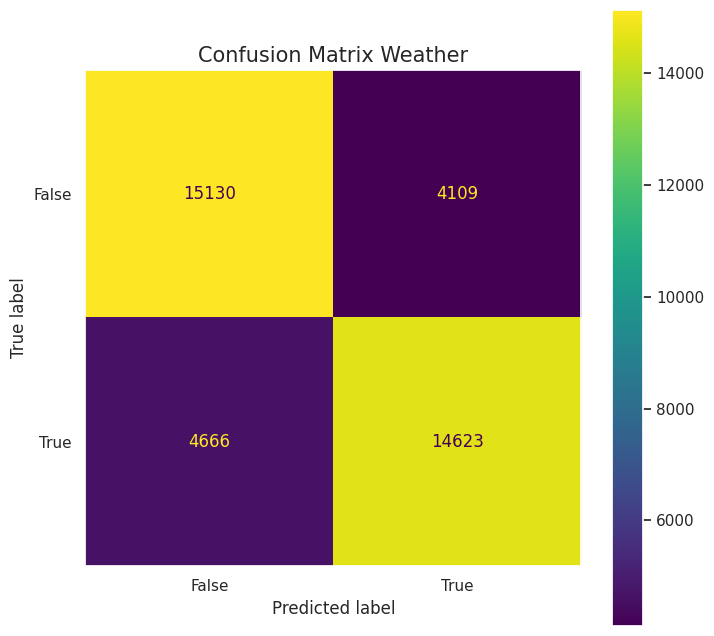

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix Weather', size=15)

plt.show()

In [ ]:
print(f'Classification Report:\n{classification_report(yWeather_balanced_test, yWeather_balanced_svm_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     19239
           1       0.78      0.76      0.77     19289

    accuracy                           0.77     38528
   macro avg       0.77      0.77      0.77     38528
weighted avg       0.77      0.77      0.77     38528



**Analisis Pengaruh Resampling terhadap Score Recall** : Sebelum dilakukan SMOTE, model SVM memiliki recall yang rendah pada kelas minoritas sebesar 0.44. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.76, menunjukkan bahwa model SVM menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar. Hal ini disebabkan karena SMOTE melakukan oversampling pada sampel-sampel pada kelas minoritas sehingga membuat model SVM memiliki lebih banyak data untuk dipelajari pada kelas minoritas. Namun, perlu diingat bahwa SMOTE dapat memperkenalkan noise pada data dan peningkatan recall pada kelas minoritas dapat dikompromikan dengan penurunan precision pada kelas minoritas atau peningkatan false positive rate pada kelas mayoritas. Oleh karena itu, evaluasi yang cermat perlu dilakukan untuk memilih model SVM terbaik.

### 9.8.3 ROC

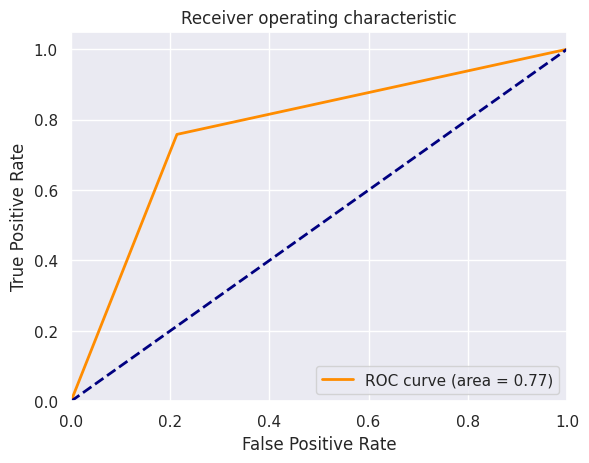

In [ ]:
from sklearn.metrics import roc_curve, auc

# Memprediksi kelas pada data uji
yWeather_balanced_pred = svm_modelWeather_balanced.predict(XWeather_balanced_test)

# Menghitung nilai FPR, TPR, dan AUC
fpr, tpr, thresholds = roc_curve(yWeather_balanced_test, yWeather_balanced_pred)
roc_auc = auc(fpr, tpr)

# Menampilkan kurva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 9.10 Analisi Model SVM 
1. Dengan menggunakan model SVM didapatkan accuracy score sebesar 0.77, precision score 0.78, dan recall score sebesar 0.75
2. Dari confusion matrix yang dihasilkan dari 20% data pengujian, didapatkan kesimpulan sebagai berikut:
    - Data bahwa model memprediksi negatif dan kenyataannya memang negatif(TN) sebanyak 15130
    - Data bahwa model memprediksi positif dan kenyatannya negatif(FP) sebanyak 4109
    - Data bahwa model memprediksi negatif dan kenyataanya positif(FN) sebanyak 4666
    - Data bahwa model memprediksi negatif fan kenyataanya memang positif(TP) sebanyak 14623
3. Dari ROC, dihasillkan nilai AUC adalah 0.77 yang menandakan bahwa model klasifikasi memiliki performa yang cukup baik untuk memprediksi label atau kelas dari suatu data. Dengan nilai 0.77 menunjukkan bahwa model dapat membedakan antara dua kelas dengan akurasi sekitar 77%.